# Code pour la classification non-supervisée



In [1]:
import numpy as np
from math import *
import random
import matplotlib.pyplot as plt

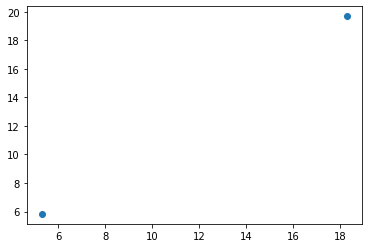

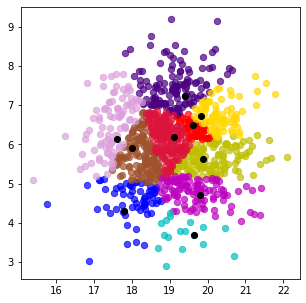

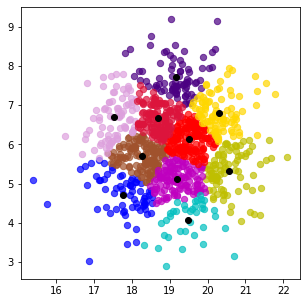

In [2]:


def closer_point(a,x):  #fonction pour determiner dans quelle cellule de Voronoi sera une observation 
    d=np.linalg.norm([a-x[0]],2)
    n=0
    for i in range(1,len(x)):
        if(np.linalg.norm(a-x[i])<d):
            d=np.linalg.norm([a-x[i]],2)
            n=i
    return(n)


def Part_ver2(x,u): #fonction qui retourne une K liste représentant les cellules de Veronoi
    L=[]
    for i in range(0,len(x)): 
        L.append([])
    n=0
    for i in range(len(u[0])):
        n=closer_point(u[:,i],x)
        L[n].append(list(u[:,i]))
    return(L)


def ins(s,y):#fonction booléenne pour savoir si un point appartient à une liste
    for i in range(len(y)):
        if (s[0]==y[i][0] and s[1]==y[i][1]):
            return(True)
    return(False)


def Esp_cond2(u, y): #itération de lloyd façon Monte-Carlo
    S1=np.array([0,0])
    S2=0
    for i in range(len(u[0])):
        if (ins(u[:,i],y)==True): 
            S1=S1+u[:,i]
            S2=S2+1
    return(S1/S2)


def D_k2(x, L, K): #fonction de distorsion pour une grille
    m=0
    for i in range(0,K):
        for j in L[i]:
            m=m+np.linalg.norm(x[i]-j,2)
    return(sqrt(np.mean(m)))
    

    
def afficher(L,col,K, x1): #afficher les clusters et les cellules associées
    plt.figure(figsize=(5,5))
    for i in range(K):
        s=np.array(L[i])
        plt.scatter(s[:,0],s[:,1],c=col[i], alpha=0.7, s=40)#alpha=transparence des points et s= taille des points
    v=np.array(x1)
    plt.scatter(v[:,0],v[:,1],c='k')
       
    
    
def algo_lloydd2(u,K,col):
    L=np.random.choice(range(1,len(u[0])), K, replace=False) #grille aléatoire de départ
    x0=np.array([u[:,i] for i in L])
    L1 = Part_ver2(x0, u) #cellules de veronoi associé
    D = []
    D.append(D_k2(x0, L1, K)) #stock les erreurs depuis le début
    L0 = []
    x1 = x0
    D0=D[0]
    D1=D0
    afficher(L1,col,K, x1) #affiche les clusters initiaux et les cellules de veronoi associé
    for j in range(50): #Aucun résultat de convergence donc on fixe une limite si l'algorithme ne converge pas
        for i in range(0,K): #itérations
            x1[i] = Esp_cond2(u, L1[i])
        L0=L1
        L1=Part_ver2(x1, u)
        D0=D1
        D1=D_k2(x1, L1, K)
        D.append(D1)
    afficher(L1,col,K, x1) #cluster et cellules finales
    return(x1, D)
    

         
def gen_NI2(n, u, M): #générer des variables aléatoires de loi N(u,M)
    x=np.array([np.random.normal(0,1,n),np.random.normal(0,1,n)])
    L=np.linalg.cholesky(M) 
    P=np.dot(L,x) 
    s=u[0]*np.ones((1,n),dtype=float)
    t=u[1]*np.ones((1,n),dtype=float)
    k=np.vstack((s,t))
    z=k+P
    return(z)
 
   
couleur=['b','sienna','y','m','c','r','indigo','plum','gold','crimson']   
M=np.array([[1,0],
             [0,1]])  
u=np.array([19,6]) 
z=gen_NI2(1000,u,M) #On génère nos échantillons selon la loi N(u,M)


s,D=algo_lloydd2(z,10,couleur) #s est la grille optimale D l'erreur de quantification pour toutes les itérations.


(2, 1000)


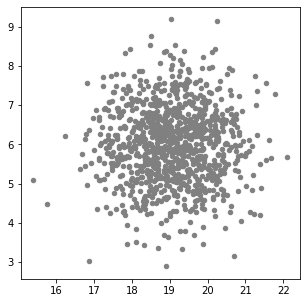

In [13]:
t=np.array(z)
print(t.shape)
plt.figure(figsize=(5,5))
plt.scatter(t[0,:],t[1,:],c='grey',s=20)

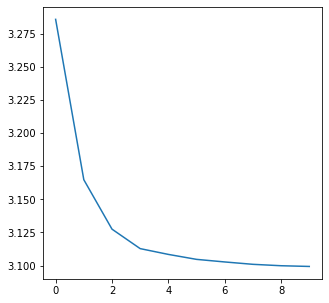

In [36]:
plt.figure(figsize=(5,5))
plt.plot(np.log(D)[:10])
#plt.title("évolution du logarithme de l'erreur de quantification")

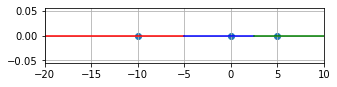

In [21]:
plt.figure(figsize=(5,1))
plt.grid()
plt.xlim([-20,10])
plt.scatter([-10,0,5],[0,0,0])
plt.plot([-20,-5],[0,0],c='r')
plt.plot([-5,2.5],[0,0],c='b')
plt.plot([2.5,10],[0,0],c='g')